# Interpolación de Newton

Mario Valverde

In [1]:
import pandas as pd
import numpy as np
from sympy import symbols, init_printing, expand, lambdify
import matplotlib.pyplot as plt
from time import time
from random import randint

x = symbols('x')

Definición de las clases para interpolación

In [2]:
class NumMethods:

    def __init__(self, Xs, Ys):
        self.puntosX = Xs
        self.puntosY = Ys
        self.matriz = []
        self.expr = 0

    # def llenarPuntos(self):
    #     numPuntos = int(input('Cuántos puntos vas a ingresar? '))
    #     x = []
    #     y = []
    #     for i in range(numPuntos):
    #         x.append(float(input('x = ')))
    #         y.append(float(input('y = ')))
    #     return x, y

    def NewtonInterpol(self):
        self.matriz.append(self.puntosX)
        self.matriz.append(self.puntosY)
        self.diferenciasFinitas(len(self.puntosX) - 1)
        # print(self.matriz)
        temp = 1
        expr = self.matriz[1][0]
        for i in range(2, len(self.matriz)):
            for j in range(0, i-1):
                temp *= x-self.matriz[0][j]
            expr += self.matriz[i][0]*temp
            temp = 1

        print('polinomio calculado:')
        print(expand(expr))
        self.expr += expr

    def diferenciasFinitas(self, actual):
        if actual == 0:
            return self.puntosY
        self.diferenciasFinitas(actual - 1)
        col = []

        for i in range(len(self.puntosY) - actual):
            fx1 = self.matriz[-1][i+1]
            fx0 = self.matriz[-1][i]
            x1 = self.matriz[0][len(self.matriz) - 1 + i]
            x0 = self.matriz[0][i]
            col.append(self.diferencia(fx1, fx0, x1, x0))
        if not col in self.matriz:
            self.matriz.append(col)
        return col

    def diferencia(self, fx1, fx0, x1, x0):
        return (fx1 - fx0)/(x1-x0)

    def Lagrange(self):
        X = self.puntosX
        Y = self.puntosY
        print(X)
        print(Y)
        expr = 0
        for i in range(len(X)):
            temp = 1
            for j in range(len(X)):
                if j == i:
                    pass
                else:
                    temp *= (x - X[j])/(X[i] - X[j])
            expr += temp*Y[i]
        expr = expr.expand()
        print('Polinomio calculado:')
        print(expr)
        self.expr = expr

    def Grafica(self):
        a = np.linspace(min(self.puntosX), max(self.puntosX), 1000)
        b = [self.expr.subs(x, i) for i in a]
        plt.plot(a, b)
        plt.scatter(self.puntosX, self.puntosY)
        plt.show()

## Importamos y procesamos los datos

In [4]:
Xs = [-2, -1, -0.5, 0.5, 1, 2]
Ys = [-637, -96.5, -20.5, 20.5, 96.5, 637]

## Resolvemos la interpolación

In [5]:
MN = NumMethods(Xs, Ys)
t = time()
MN.NewtonInterpol()
print(f'El tiempo de ejecución fue de {time() - t} segundos')

polinomio calculado:
74.0*x**3 + 22.5*x
El tiempo de ejecución fue de 0.23092150688171387 segundos


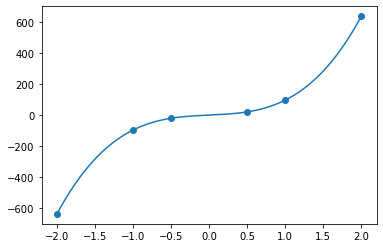

In [6]:
MN.Grafica()

[-2, -1, -0.5, 0.5, 1, 2]
[-637, -96.5, -20.5, 20.5, 96.5, 637]
Polinomio calculado:
-3.5527136788005e-15*x**5 + 74.0*x**3 + 22.5*x
El tiempo de ejecución fue de 0.0 segundos


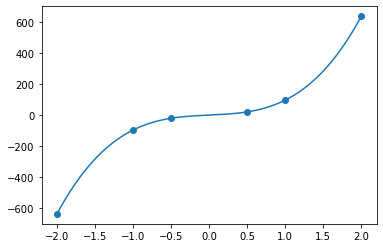

In [9]:
MN = NumMethods(Xs, Ys)
MN.Lagrange()
t = time()
print(f'El tiempo de ejecución fue de {time() - t} segundos')
MN.Grafica()